# Paso 1: Obtencion de datos

#Referencia:
https://github.com/taljuk01/Sentiment_Analysis_Politica-Argentina

In [1]:
import GetOldTweets3 as got


def scrapper(initdate, finaldate ,toptweets, maximo, words=[]):
    s1=[]
    lista_final=[]
    for word in words:
        try:
            s1.append(got.manager.TweetCriteria().setQuerySearch(word).setSince(initdate).setUntil(finaldate).setTopTweets(toptweets).setMaxTweets(int(maximo)))
        except: continue
    
    for i in range (len(s1)):
        lista_final.append(got.manager.TweetManager.getTweets(s1[i]))
    return lista_final

In [2]:
#KeyWords for each candidate
res0= ['Espert', '#Despertar', '@jlespert', '@luisrosalesARG','@FrenteDespertar', '#DejenCompetirAEspert']
res1=['macri', 'pichetto', '#JUNTOSPORELCAMBIO', '@MAURICIOMACRI', '@MIGUELPICHETTO', '@JUNTOSCAMBIOAR']
res2=['@cfkargentina', '@alferdez', 'fernandez-fernandez', '@frentedetodos', 'alberto fernandez']
res3=['@RLavagna', '#consensofederal', 'urtubey']
res4=['Nicolas del caño', '#FITunidad', '@FTE_izquierda', '@NicolasdelCano', '#YoVoteFITUnidad', '@RominaDelPla']
res5=['@juanjomalvinas', '#FrenteNOS']

In [3]:
resultado0=scrapper("2019-10-01", "2019-10-27",True, 3500, res0)#Espert
resultado1=scrapper("2019-10-01", "2019-10-27",True, 3500, res1)#Macri
resultado2=scrapper("2019-10-01", "2019-10-27",True, 3500, res2)#CFK
resultado3=scrapper("2019-10-01", "2019-10-27",True, 3500, res3)#Lavagna
resultado4=scrapper("2019-10-01", "2019-10-27",True, 3500, res4)#Delcaño
resultado5=scrapper("2019-10-01", "2019-10-27",True, 3500, res5)#malvinas

In [13]:
len(resultado0)

6

In [4]:
def extractor(tweets):
    l1,l2,l3,l4,l5,l6=[],[],[],[],[],[]

    for i in range(len(tweets)):
        for tweet in tweets[i]:
            l1.append(tweet.text)
            l2.append(tweet.date)
            l3.append(tweet.username)
            l4.append(tweet.hashtags)
            l5.append(tweet.favorites)
            l6.append(tweet.retweets)
        
    final=pd.DataFrame(list(zip(l1, l2,l3,l4,l5,l6)), 
                       columns =['Tweets', 'Date','User', 'hashtags', 'Favs','RT'])

    
    return final

In [5]:
import pandas as pd

df0=extractor(resultado0)
df1=extractor(resultado1)
df2=extractor(resultado2)
df3=extractor(resultado3)
df4=extractor(resultado4)
df5=extractor(resultado5)

In [6]:
df0.head()

,Tweets,Date,User,hashtags,Favs,RT
0,Espert dice la S word,2019-10-26 23:45:11+00:00,soypresci,,0,0
1,Dear predident Dear president Happy Birthday t...,2019-10-26 22:11:55+00:00,Libersens1,,3,0
2,Hard stalking cj... ?,2019-10-26 21:52:49+00:00,vddggg,,1,0
3,wat da fuk,2019-10-26 21:37:35+00:00,cjbarroso,,1,0
4,"Señores candidatos @RLavagna, @alferdez, @maur...",2019-10-26 21:22:49+00:00,gonzalocristini,#BoletaUnicaDePapel,26,6


In [7]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(2878, 6)
(8457, 6)
(9166, 6)
(426, 6)
(1122, 6)
(487, 6)


In [8]:
dfa=df0.drop(['Date'], axis=1)
dfb=df1.drop(['Date'], axis=1)
dfc=df2.drop(['Date'], axis=1)
dfd=df3.drop(['Date'], axis=1)
dfe=df4.drop(['Date'], axis=1)
dff=df5.drop(['Date'], axis=1)

In [9]:
with pd.ExcelWriter(r'./5partidos_mes.xlsx', engine='xlsxwriter',options={'strings_to_urls': False}) as writer:
     
        dfa.to_excel(writer, sheet_name='espert',index = None, header=True)
        dfb.to_excel(writer, sheet_name='macri',index = None, header=True)
        dfc.to_excel(writer, sheet_name='cfk',index = None, header=True)
        dfd.to_excel(writer, sheet_name='lavagna',index = None, header=True)
        dfe.to_excel(writer, sheet_name='fit',index = None, header=True)
        dff.to_excel(writer, sheet_name='centuirion',index = None, header=True)

# Paso2: Eliminando menciones conjuntas

In [10]:
men_FF=['alberto','cfk','cristina','fernandez','fernández','massa','ff','alferdez'] #formas de nombrar a Alberto o a su partido
men_MM=['macri','mm','mauricio','pichetto','vidal'] #formas de nombrar a Mauricio Macri o a su partido
men_FIT=['caño','nico','nicolas','nicolás'] #formas de nombrar a Nicolas del Caño  o a su partido
men_espert=['espert','josé','luis','profesor','rosales'] #formas de nombrar a Espert o a su partido
men_lavagna=['lavagna','roberto','urtubey'] #formas de nombrar a Lavagna o a su partido
men_cent=['gomez','centurion','centurión'] #formas de nombrar a Gomez Centurión o a su partido

In [11]:
others_M= men_FF +  men_FIT + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Macri
others_FF= men_MM +  men_FIT + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Alberto Fernandez
others_LAVG= men_FF +  men_FIT + men_espert + men_MM + men_cent # mención de otros candidatos en el dataset de Lavagna
others_FIT= men_FF +  men_MM + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Nicolás del Caño
others_ESP= men_FF +  men_FIT + men_MM + men_lavagna + men_cent # mención de otros candidatos en el dataset de Espert
others_CENT= men_FF +  men_FIT + men_MM + men_lavagna + men_espert # mención de otros candidatos en el dataset de Gomez Centurión

In [12]:
import re
from nltk import word_tokenize 


In [13]:
from nltk import punkt

In [14]:
def eliminador(tweet,nombres):
    temp=str(tweet)
    
    temp= re.sub(r'\W+', ' ',temp) #elimino simbolos, ya que aplicaremos esta función sobre los tweets sin procesar
                                   
    tokens=word_tokenize(temp) #tokenizamos
    for word in tokens:
        for nombre in nombres:
            x = re.findall(nombre, word.lower()) 
            if x :
                empty=''
                return empty # si encuentra la mención un candidato ajeno al partido, se elimina el tweet
            else:
                continue # continuamos hasta encontrar una coincidencia
    return tweet #si no se encuentra una mención de otro candidato, se retorna el tweet original

In [15]:
dfa.head()

,Tweets,User,hashtags,Favs,RT
0,Espert dice la S word,soypresci,,0,0
1,Dear predident Dear president Happy Birthday t...,Libersens1,,3,0
2,Hard stalking cj... ?,vddggg,,1,0
3,wat da fuk,cjbarroso,,1,0
4,"Señores candidatos @RLavagna, @alferdez, @maur...",gonzalocristini,#BoletaUnicaDePapel,26,6


In [16]:
dfa['Tweets']=dfa["Tweets"].map(lambda x : eliminador(x,others_ESP))  #OJO, no aplicarlo sobre columna corregido

In [17]:
dfa.head()

,Tweets,User,hashtags,Favs,RT
0,Espert dice la S word,soypresci,,0,0
1,Dear predident Dear president Happy Birthday t...,Libersens1,,3,0
2,Hard stalking cj... ?,vddggg,,1,0
3,wat da fuk,cjbarroso,,1,0
4,,gonzalocristini,#BoletaUnicaDePapel,26,6


In [18]:
dfa[dfa.Tweets==''].count() #Tweets eliminados

Tweets      787
User        787
hashtags    787
Favs        787
RT          787
dtype: int64

In [19]:
dfa=dfa[dfa.Tweets!='']

In [20]:
dfa.shape

(2091, 5)

In [21]:
dfb['Tweets']=dfb["Tweets"].map(lambda x : eliminador(x,others_M))

In [22]:
dfb.head()

,Tweets,User,hashtags,Favs,RT
0,No podemos perderla!!! Es lo mejor que le pudo...,patino_vanesa,#seamoslibreslodemassearregla #VidalGobernador...,18,10
1,,caetuscap,,2,0
2,Que distintas formas de esperar las elecciones...,elcoya1977,,1015,437
3,#26Oct #Argentina #Presidenciales Me confirma ...,ReporteYa,#26Oct #Argentina #Presidenciales #BuenosAires,36,122
4,,BanzasGuillermo,,1463,1059


In [23]:
dfb=dfb[dfb.Tweets!='']
dfb.shape

(7272, 5)

In [24]:
dfc['Tweets']=dfc["Tweets"].map(lambda x : eliminador(x,others_FF))

In [25]:
dfc.head()

,Tweets,User,hashtags,Favs,RT
0,So let me introduce to you the one and only AL...,N_otKanan,,1,0
1,,maduro_en,#Bolivia,30,36
2,RT RT RT,maricocina,,2,2
3,POR FAVOR @CFKArgentina . https://twitter.com/...,biaanquita,,1,0
4,,shiafatwa9,,0,0


In [26]:
dfc=dfc[dfc.Tweets!='']
dfc.shape

(7645, 5)

In [27]:
dfd['Tweets']=dfd["Tweets"].map(lambda x : eliminador(x,others_LAVG))

In [28]:
dfd=dfd[dfd.Tweets!='']
dfd.shape

(311, 5)

In [29]:
dfe['Tweets']=dfe["Tweets"].map(lambda x : eliminador(x,others_FIT))
dfe=dfe[dfe.Tweets!='']
dfe.shape

(892, 5)

In [30]:
dff['Tweets']=dff["Tweets"].map(lambda x : eliminador(x,others_CENT))
dff=dff[dff.Tweets!='']
dff.shape

(415, 5)

# Paso 3: Creacion del corpus de entrenamiento

 Ante la necesidad de adaptar el algoritmo a las expresiones y modismos que utilizan los argentinos al momento de hablar sobre política, se decidió armar un corpus propio de entrenamiento y no hacer uso de corpus lingüísticos internacionales, como los que
provee la sociedad española de Natural Language Processing (corpus TASS).  
(De todos modos, para los interesados se deja el link para descargarlo : [corpus TASS](http://www.sepln.org/workshops/tass/tass_data/download.php?auth=SthaMsBsw4leVvKe1r9))  
Para armar este corpus político se clasificó manualmente cerca de 3 mil tweets del total de tweets scrapeados, con las leyendas positivo, negativo y ambiguo, siempre buscando que las 3 clases se encuentren balanceadas (mil tweets clasificados por
cada sentimiento).  

In [31]:
pwd

'/home/alex/Desktop/GitHub_repo/Sentiment_Analysis_Politica-Argentina'

In [32]:
ls

 5partidos_mes.xlsx                 PASO-v2.ipynb
 5partidos.xlsx                     PASO-v3.ipynb
 cloud_candidates.png               PASO-v4.ipynb
 cloud.png                          README.md
 datasets/                         'Scrapping Sofmanarg.ipynb'
 How_Not_to_Predict_Elections.pdf   todos_los_tweets.txt
 imagenes/                          Untitled1.ipynb
 PASO.ipynb


In [33]:
test_ds=pd.read_excel('datasets/train_dataset_FINAL.xlsx')
test_ds.head()

,Tweets,polaridad
0,"*678, DDD y Barone. *Urtubey y el premio al má...",AMBIGUO
1,*conversación con mi abuelo* -Te tengo que pas...,NEGATIVO
2,*Incomodidad,AMBIGUO
3,"""boletas nefastas"" *se levantan todos* hay uno...",NEGATIVO
4,..atreves hacer comparaciones sin matizes entr...,NEGATIVO


In [34]:
test_ds.shape

(14026, 2)

# Paso 4: Procesamiento del conjunto de entrenamiento

- Se convierte todo el texto a mínuscula
- Se eliminan todo tipo de caracteres no alfabéticos
- Se eliminan todo tipo de URL's 
- Se reemplazan usuarios por AT_USER
- Se detecta todo tipo de insulto o palabra despectiva y se lo transforma a la etiqueta 'toxicword', con el objetivo de unificar - PENDIENTE
- Se eliminan 'stopwords' (palabras que se repiten con mucha frecuencia)
- Se unifican las risas : 'ajjajajajajaj' ----> 'jaja', 'jojojo'----> jaja -PENDIENTE
- Se lleva a cabo un spellchecking, es decir, se corrigen las palabras mal escritas debido a modismos en redes sociales. - PENDIENTE  
Ej: 'xq'--> 'porque' , 'q' ---> 'que', etc.
- Se eliminan frases que hagan referencia a cosas dichas por otras personas.  - PENDIENTE



In [35]:
import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
stopwords_spanish=stopwords.words('spanish')

In [36]:
stopwords_spanish

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [37]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
emoticons = emoticons_happy.union(emoticons_sad)

In [38]:
def text_cleaner(tweet):
        # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'pic.twitter\S+','some_pic',tweet)
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
        # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
      # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_spanish and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            #stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(word)
 
    return ' '.join(tweets_clean)

In [39]:
text_cleaner('EL 11 DE AGOSTO, HAY ALTERNATIVA | #SanFernando es una ciudad que quiere y puede avanzar. Desde @CFederalPBA estamos convencidos de que con equipo, propuestas concretas y los valores que faltan, podemos vivir mejor. @RLavagna @BuccaBali Lista 137 Apic.twitter.com/OJWmiO1oqo')

'11 agosto alternativa sanfernando ciudad quiere puede avanzar at_user convencidos equipo propuestas concretas valores faltan podemos vivir mejor at_user at_user lista 137 asome_pic'

In [40]:
text_cleaner('#11CádizCF| David Gil Iza Carcelen Fali Cala Espino Garrido Bodiger Álex Fernández Salvi Sánchez Javi Navarro Caye Quintana #CádizMálaga #MCFLive')

'11cádizcf david gil iza carcelen fali cala espino garrido bodiger álex fernández salvi sánchez javi navarro caye quintana cádizmálaga mcflive'

In [41]:
text_cleaner('12 años no les alcanzaron para lo IMPORTANTE? Manga de chorros, corruptos!!!! Cómo todo peroncho rufianes y mercenarios!!!!!')

'12 años alcanzaron importante manga chorros corruptos cómo peroncho rufianes mercenarios'

In [42]:
test_ds.head()

,Tweets,polaridad
0,"*678, DDD y Barone. *Urtubey y el premio al má...",AMBIGUO
1,*conversación con mi abuelo* -Te tengo que pas...,NEGATIVO
2,*Incomodidad,AMBIGUO
3,"""boletas nefastas"" *se levantan todos* hay uno...",NEGATIVO
4,..atreves hacer comparaciones sin matizes entr...,NEGATIVO


In [43]:
test_ds['tw_clean']=test_ds.Tweets.apply(lambda x: text_cleaner(x))
test_ds.head(10)

,Tweets,polaridad,tw_clean
0,"*678, DDD y Barone. *Urtubey y el premio al má...",AMBIGUO,678 ddd barone urtubey premio impresentable pa...
1,*conversación con mi abuelo* -Te tengo que pas...,NEGATIVO,conversación abuelo pasar dni averigues voto v...
2,*Incomodidad,AMBIGUO,incomodidad
3,"""boletas nefastas"" *se levantan todos* hay uno...",NEGATIVO,boletas nefastas levantan solo levantó profeso...
4,..atreves hacer comparaciones sin matizes entr...,NEGATIVO,.. atreves hacer comparaciones matizes kirchne...
5,Jajajaja...Naaa ..no votó Peronchos ..y está P...,NEGATIVO,jajajaja ... naaa .. votó peronchos .. pichett...
6,..son mugre no los queremos kukasssss,NEGATIVO,.. mugre queremos kukasss
7,"""Cuando se vaya Macri.Cdo ésto haya pasado"".Se...",AMBIGUO,vaya macri.cdo ésto pasado replica millones ar...
8,....sería de agradecer que ladrones como Macri...,NEGATIVO,... agradecer ladrones macri cría infiltrada a...
9,....sería de agradecer que ladrones como Macri...,NEGATIVO,... agradecer ladrones macri cría infiltrada a...


In [44]:
test_ds.shape

(14026, 3)

In [45]:
from sklearn.model_selection import cross_validate,train_test_split,GridSearchCV

X_train, X_test, y_train, y_test= train_test_split(test_ds.tw_clean,test_ds.polaridad,test_size=0.2,random_state=42,shuffle=True)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220,)
(11220,)
(2806,)
(2806,)


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC

pipeline1 = Pipeline([
                ('tfidf', TfidfVectorizer(sublinear_tf=True, # curva logarítmica
                                          ngram_range=(1,2), # uso de bigramas
                                          norm='l2', # se utlizan vectores con norma unitaria
                                          
                                         )),
                
                 ('clf', OneVsRestClassifier(LinearSVC(C=1,multi_class='ovr',random_state=1,tol=0.01)))
                 
            ])


In [48]:
#me falta hacer GridTest

In [49]:
pipeline1.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None,
                                                         dual=True,

In [50]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline1,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print('mean= ',scores.mean().round(2),'std= ',scores.std().round(2))

[0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02


In [51]:
scores_list=['accuracy','precision_micro','recall_micro','f1_weighted']
for score in scores_list:
    scores=cross_val_score(pipeline1,X_train,y_train,cv=5,scoring=score)
    print(f'{score}=',scores)
    print('mean= ',scores.mean().round(2),'std= ',scores.std().round(2))

accuracy= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
precision_micro= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
recall_micro= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
f1_weighted= [0.93385471 0.9320064  0.92883749 0.89294985 0.8960857 ]
mean=  0.92 std=  0.02


In [52]:
prediction=pipeline1.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

report = classification_report(y_test, prediction, output_dict=True)

print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
print('positive: ', report['POSITIVO'])
print('negative: ', report['NEGATIVO'])
print('ambiguo: ', report['AMBIGUO'])

Test accuracy is 0.9372772630078403
positive:  {'precision': 0.8461538461538461, 'recall': 0.5789473684210527, 'f1-score': 0.6875, 'support': 133}
negative:  {'precision': 0.9348552338530067, 'recall': 0.9784382284382285, 'f1-score': 0.9561503416856492, 'support': 1716}
ambiguo:  {'precision': 0.9510337323177367, 'recall': 0.9132706374085684, 'f1-score': 0.9317697228144989, 'support': 957}


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

mat=confusion_matrix(y_test,prediction,)
plt.figure(figsize=(10,10))
sns.heatmap(mat,square=True,annot=True,cbar=True,)
plt.xlabel('prediction')
plt.ylabel('true value');

In [55]:
mat

array([[ 874,   81,    2],
       [  25, 1679,   12],
       [  20,   36,   77]])

# Paso 5: Uso del modelo

In [56]:
dfa["tw_clean"]=dfa["Tweets"].map(lambda x : text_cleaner(x)) #espert
dfb["tw_clean"]=dfb["Tweets"].map(lambda x : text_cleaner(x)) #MM
dfc["tw_clean"]=dfc["Tweets"].map(lambda x : text_cleaner(x)) #CFK
dfd["tw_clean"]=dfd["Tweets"].map(lambda x : text_cleaner(x)) #Lav
dfe["tw_clean"]=dfe["Tweets"].map(lambda x : text_cleaner(x)) #delcaño
dff["tw_clean"]=dff["Tweets"].map(lambda x : text_cleaner(x)) #centurion

In [57]:
dfa['predicted_polarity'] = pipeline1.predict(dfa['tw_clean']) 
dfb['predicted_polarity'] = pipeline1.predict(dfb['tw_clean'])
dfc['predicted_polarity'] = pipeline1.predict(dfc['tw_clean'])
dfd['predicted_polarity'] = pipeline1.predict(dfd['tw_clean'])
dfe['predicted_polarity'] = pipeline1.predict(dfe['tw_clean'])
dff['predicted_polarity'] = pipeline1.predict(dff['tw_clean'])


In [58]:
Esp_pred=dfa.groupby('predicted_polarity').tw_clean.count()
Esp_pred

predicted_polarity
AMBIGUO      888
NEGATIVO    1069
POSITIVO     134
Name: tw_clean, dtype: int64

In [59]:
MM_pred=dfb.groupby('predicted_polarity').tw_clean.count()
MM_pred

predicted_polarity
AMBIGUO     2292
NEGATIVO    4025
POSITIVO     955
Name: tw_clean, dtype: int64

In [60]:
(MM_pred/MM_pred.sum()).round(2)

predicted_polarity
AMBIGUO     0.32
NEGATIVO    0.55
POSITIVO    0.13
Name: tw_clean, dtype: float64

In [61]:
CFK_pred=dfc.groupby('predicted_polarity').tw_clean.count()
CFK_pred

predicted_polarity
AMBIGUO     2619
NEGATIVO    4136
POSITIVO     890
Name: tw_clean, dtype: int64

In [62]:
(CFK_pred/CFK_pred.sum()).round(2)

predicted_polarity
AMBIGUO     0.34
NEGATIVO    0.54
POSITIVO    0.12
Name: tw_clean, dtype: float64

In [63]:
Cano_pred=dfd.groupby('predicted_polarity').tw_clean.count()
Cano_pred

predicted_polarity
AMBIGUO     105
NEGATIVO    133
POSITIVO     73
Name: tw_clean, dtype: int64

In [64]:
malv_pred=dfe.groupby('predicted_polarity').tw_clean.count()
malv_pred

predicted_polarity
AMBIGUO     317
NEGATIVO    436
POSITIVO    139
Name: tw_clean, dtype: int64

# Vote Share Method

VotShare(c1)=[Pc1+Nc2]/[Pc1+Pc2+Nc1+Nc2]

In [65]:
universe=MM_pred['POSITIVO']+CFK_pred['NEGATIVO']+MM_pred['NEGATIVO']+CFK_pred['POSITIVO']
universe

10006

In [66]:
vot_share_MM=(MM_pred['POSITIVO']+CFK_pred['NEGATIVO'])/universe
vot_share_MM.round(2)

0.51

In [67]:
vot_share_CFK=(MM_pred['NEGATIVO']+CFK_pred['POSITIVO'])/universe
vot_share_CFK.round(2)

0.49

# Cloud of Words

In [134]:
df_all=pd.concat([dfa,dfb,dfc,dfd,dfe,dff])
df_all.shape

(32239, 7)

In [135]:
df_all.head()

,Tweets,User,hashtags,Favs,RT,tw_clean,predicted_polarity
1,"Pobrecito, le pegaron un pijazo en la nuca y l...",cristian_dureOK,,0,0,pobrecito pegaron pijazo nuca dejaron twittean...,NEGATIVO
2,Eso condice con su condicion de seguidora de e...,marineroderadio,,2,0,condice condicion seguidora espert milei,AMBIGUO
3,Tampoco olvidar el episodio del tiroteo a la c...,Maldana__,,2,4,tampoco olvidar episodio tiroteo camioneta esp...,NEGATIVO
4,Que se lave la jeta este que se cree? Es un de...,mariel48465691,,0,0,lave jeta cree despota parece hermano reconoci...,NEGATIVO
5,Hacela peor y anda por Espert ahre,Lauchus_,,0,0,hacela peor anda espert ahre,NEGATIVO


In [137]:
text=''.join(tweet for tweet in df_all['tw_clean'])
text

"pobrecito pegaron pijazo nuca dejaron twitteando pelotudecescondice condicion seguidora espert mileitampoco olvidar episodio tiroteo camioneta espert resulto ser camioneta empresario bingos pbalave jeta cree despota parece hermano reconocido esperthacela peor anda espert ahregrande profegrande espert vote dije aeroparque si acordasgiacominijajakakskwkwkka quiero tetas ajjsjsjsjsalgún día van dar cuenta vuelva socialismo pais van funfidoscuidado contigo grabboismañana voy 3er cordon conurbano cap cuidar votos futuro liberalismo argentino santoro at_user at_user at_user respeto espero q dsps ola populista logren poder jxc camino espert topo mafia kquiero ver gobernar espert resto reirme q dicen si pueden hacerchiques at_user at_user ... pregunta ... tal carrino ... ¿ alguien ahhh ... instituto cato ayudante inspector clouseau ...tomarse birra terminar votando espert veda surrealentrevista espert at_user ¡ parala lakaaa necesito nivel locura candidato acá bello profundamente horrible vez

In [138]:
with open("todos_los_tweets.txt", "w",encoding="utf-8") as text_file:
     text_file.write(text)

In [139]:
with open("todos_los_tweets.txt", "r",encoding="utf-8") as myfile:
     data=myfile.read()

In [142]:
from PIL import Image, ImageDraw
mask1=np.array(Image.open('cloud.png')) #imagen vectorizada

Generating Wordclouds:
https://www.datacamp.com/community/tutorials/wordcloud-python

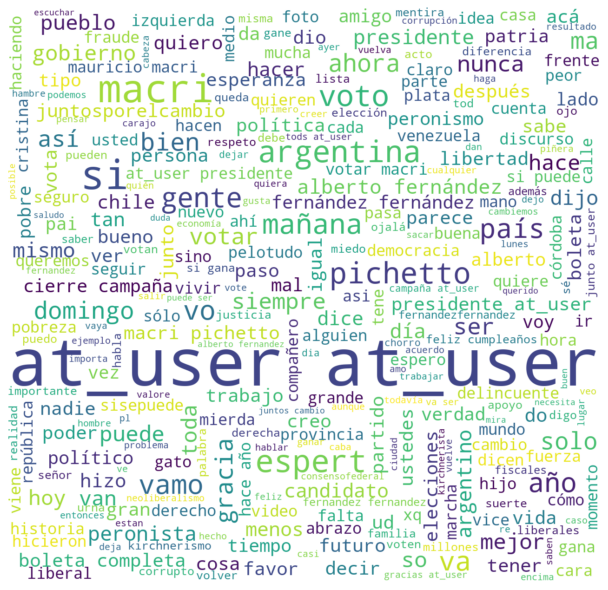

In [148]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud= WordCloud(width=1280,height=1240,
                    background_color='white',
                    min_font_size=5,
                    max_font_size=300,
                    max_words=300,
                    #mask=mask1, #si saco esto sale una cuadrada
                    contour_width='white',
                    stopwords=stopwords_spanish)

wordcloud.generate(data)

plt.figure(figsize=(10,8),facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file('./cloud.png')

In [149]:
dfb.head()

,Tweets,User,hashtags,Favs,RT,tw_clean,predicted_polarity
1,Ni el mismísimo Macri es macrista https://twit...,Guillecasanova1,,3,0,mismísimo macri macrista,NEGATIVO
3,Con Macri también hubo medios de transporte a ...,GonzarezDC3,,0,0,macri medios transporte disposición voy requie...,NEGATIVO
4,Mi estimada Milita tu cerebrito no da para más...,TrigosoAriel,,0,0,estimada milita cerebrito da comunistas izquer...,NEGATIVO
5,"Pero resulta que esos años de Macri, Lenín y P...",malgraviahhh,,0,2,resulta años macri lenín piñera respaldados ma...,NEGATIVO
7,"Pois é, mais Macri não era a solução? O proble...",allex_melo,,1,0,pois é mais macri não solução problema é achar...,NEGATIVO


In [166]:
MM_neg_wc=''.join(dfb[dfb['predicted_polarity']== 'NEGATIVO'].tw_clean)
MM_pos_wc=''.join(dfb[dfb['predicted_polarity']== 'POSITIVO'].tw_clean)
CFK_neg_wc=''.join(dfc[dfc['predicted_polarity']== 'NEGATIVO'].tw_clean)
CFK_pos_wc=''.join(dfc[dfc['predicted_polarity']== 'POSITIVO'].tw_clean)

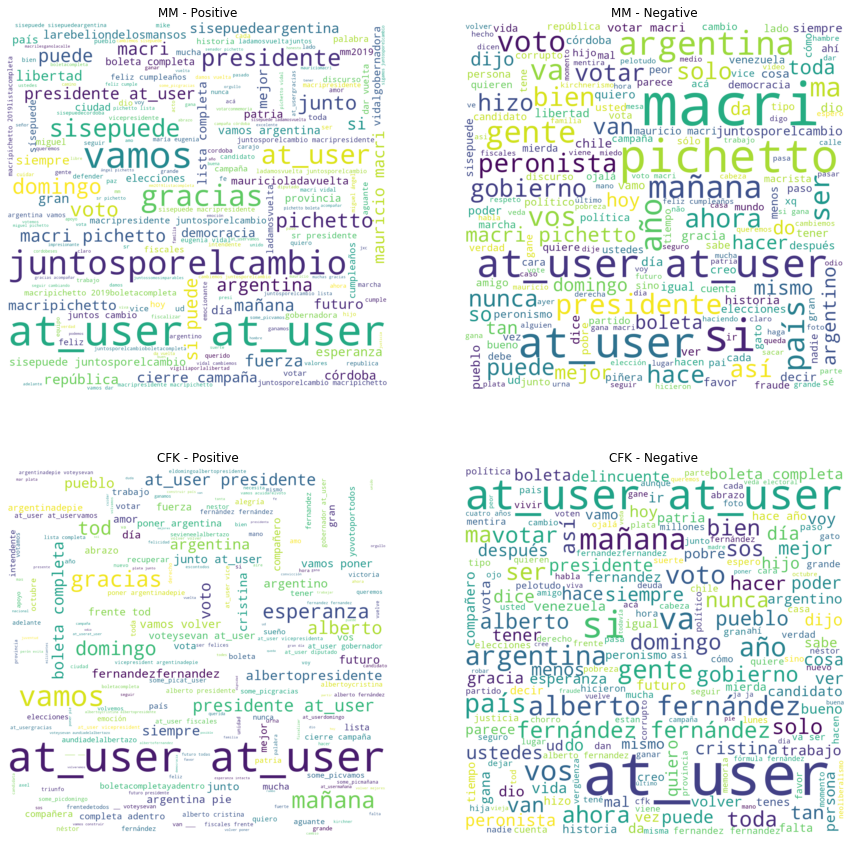

In [173]:

wordcloud= WordCloud(width=1280,height=1240,
                    background_color='white',
                    min_font_size=5,
                    max_font_size=200,
                    max_words=200,
                    #mask=mask1, #si saco esto sale una cuadrada
                    contour_width='white',
                    stopwords=stopwords_spanish)
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(wordcloud.generate(MM_pos_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('MM - Positive')

plt.subplot(222)
plt.imshow(wordcloud.generate(MM_neg_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('MM - Negative')

plt.subplot(223)
plt.imshow(wordcloud.generate(CFK_pos_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('CFK - Positive')

plt.subplot(224)
plt.imshow(wordcloud.generate(CFK_neg_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('CFK - Negative')

plt.savefig('./cloud_candidates.png')

plt.show()